# Description

Training the Restrictive Boltzmann Machine

# Imports

In [1]:
from torchvision import datasets, transforms
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from rbm import RestrictiveBM
from dataset import PatternDB
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = "./small_fixed/train"
BATCH_SIZE = 16

In [6]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])



In [7]:
dataset = PatternDB(data_path=DATA_PATH, transform=transform)
train_loader = DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=True)

# Training RBM

In [8]:
rbm = RestrictiveBM(n_visible=16384, n_hidden=32768)

In [ ]:
for epoch in range(60):
    total_loss = 0
    for data, _ in train_loader:
        data = data.view(-1, 16384)
        rbm.contrastive_divergence(data, lr=0.01)
        total_loss += rbm.reconstruction_error(data).item()
    print(f'Epoch {epoch+1}, Reconstruction Error: {total_loss / len(train_loader)}')

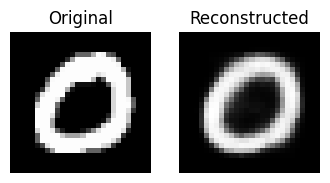

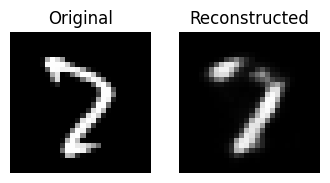

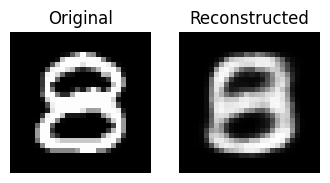

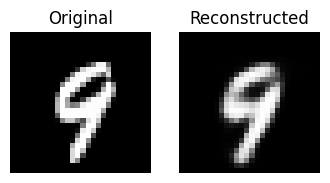

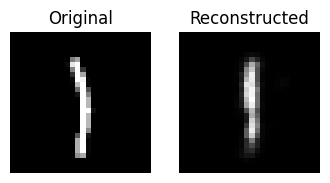

In [14]:


def display_reconstruction(rbm, data):
    data = data.view(-1, rbm.n_visible)  
    _, h_sample = rbm.sample_h(data)  
    v_prob, _ = rbm.sample_v(h_sample) 
    
    
    for i in range(5):  
        original = data[i].view(128, 128).detach().numpy()
        reconstructed = v_prob[i].view(128, 128).detach().numpy()
        
        plt.figure(figsize=(4, 2))
        
       
        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(original, cmap='gray')
        plt.axis('off')
        
        
        plt.subplot(1, 2, 2)
        plt.title("Reconstructed")
        plt.imshow(reconstructed, cmap='gray')
        plt.axis('off')
        
        plt.show()


sample_data, _ = next(iter(train_loader)) 
display_reconstruction(rbm, sample_data)
